In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from MyRegressor import MySGDRegression
from sklearn.preprocessing import StandardScaler
plt.style.use({'figure.facecolor':'white'})

In [21]:
def load_data(filename, input_variable_name, output_variable_name):
    file = pd.read_csv(filename)
    inputs = []
    for input_variable_name in input_variable_name:
        inputs.append([float(val) for val in file[input_variable_name]])
    output = [float(val) for val in file[output_variable_name]]
    return inputs, output

input_data, output_data = load_data('data/v1_world-happiness-report-2017.csv', ['Economy..GDP.per.Capita.', 'Freedom'],
                     'Happiness.Score')

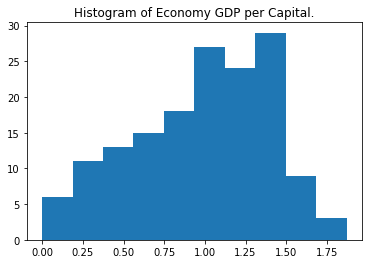

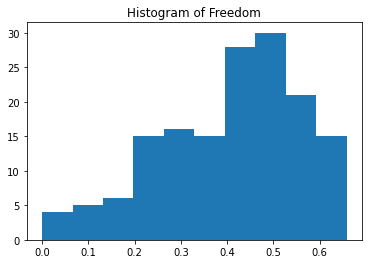

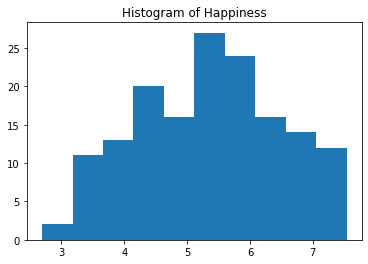

In [22]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(input_data[0], 'Economy GDP per Capital.')
plotDataHistogram(input_data[1], 'Freedom')
plotDataHistogram(output_data, 'Happiness')

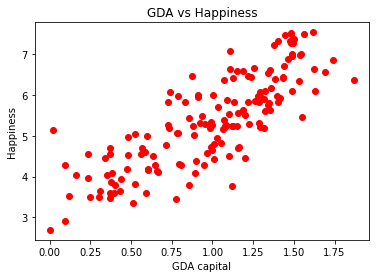

In [23]:
def plot_for_linearity(inputs, outputs, input_label, output_label, title=""):
    plt.plot(inputs, outputs, 'ro')
    plt.xlabel(input_label)
    plt.ylabel(output_label)
    plt.title(title)
    plt.show()

plot_for_linearity(input_data[0], output_data, "GDA capital", "Happiness", 'GDA vs Happiness')

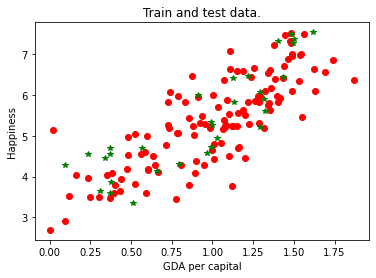

In [24]:
def split_in_train_and_test_samples(inputs, outputs):
    np.random.seed(5)
    train_sample_indexes = np.random.choice([i for i in range(len(outputs))], int(0.8 * len(outputs)), replace=False)
    validation_sample_indexes = [i for i in range(len(outputs)) if i not in train_sample_indexes]
    train_inputs = []
    validation_inputs = []
    for inp in inputs:
        train_inputs.append([inp[i] for i in train_sample_indexes])
        validation_inputs.append([inp[i] for i in validation_sample_indexes])
    train_outputs = [outputs[i] for i in train_sample_indexes]
    validation_outputs = [outputs[i] for i in validation_sample_indexes]
    return train_inputs, train_outputs, validation_inputs, validation_outputs

train_inputs, train_outputs, validation_inputs, validation_outputs = split_in_train_and_test_samples(input_data, output_data)
plt.plot(train_inputs[0], train_outputs, 'ro', label='Train')
plt.plot(validation_inputs[0], validation_outputs, 'g*', label='Test')
plt.xlabel("GDA per capital")
plt.ylabel("Happiness")
plt.title('Train and test data.')
plt.show()

Learning by tool for single feature.

In [25]:
def learn_by_tool_single_feature():
    xx = [[feature] for feature in train_inputs[0]]
    regressor = linear_model.SGDRegressor(alpha = 0.01, max_iter = 100)
    regressor.fit(xx, train_outputs)
    return regressor.intercept_[0], regressor.coef_[0]

w0, w1 = learn_by_tool_single_feature()
print('Lear model by tool returned: f(x) = ', w0, ' + ', w1, ' * x')

Lear model by tool returned: f(x) =  2.7488230151085165  +  2.5474799001897583  * x


Learning by my code for single feature.

In [26]:
def learn_by_my_code_single_feature():
    xx = [[feature] for feature in train_inputs[0]]
    regressor = MySGDRegression()
    regressor.fit(xx, train_outputs)
    error = 0.0
    for real_output, computed_output in zip(validation_outputs, regressor.predict([e] for e in validation_inputs[0])):
        error += (real_output - computed_output) ** 2
    error /= len(validation_outputs)
    return regressor.intercept_, regressor.coef_[0], error

w0, w1, error_by_me = learn_by_my_code_single_feature()
print('Lear model by me returned: f(x) = ', w0, ' + ', w1, ' * x')
print('Error', error_by_me)


OverflowError: (34, 'Numerical result out of range')

Learning by tool with bi-variate regression.

In [ ]:
def plot_3d_data(x1_train, x2_train, y_train,
                 x1Model = None, x2Model = None, yModel = None,
                 x1Test = None, x2Test = None, yTest = None, title = None):
    from mpl_toolkits import mplot3d
    ax = plt.axes(projection = '3d')
    if x1_train:
        plt.scatter(x1_train, x2_train, y_train, c = 'r', marker = 'o', label = 'train data')
    if x1Model:
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model')
    if x1Test:
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')
    plt.title(title)
    ax.set_xlabel("GPD Capital.")
    ax.set_ylabel("Freedom.")
    ax.set_zlabel("Happiness.")
    plt.legend()
    plt.show()

plot_3d_data(*train_inputs, train_outputs, title='GPD Capital vs Freedom vs Happiness.')


In [ ]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]

        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data

        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

# print(normalisation(train_inputs, validation_inputs))
train_inputs_for_normalisation = [[feat1, feat2] for feat1, feat2 in zip(*train_inputs)]
validation_inputs_for_normalisation = [[feat1, feat2] for feat1, feat2 in zip(*validation_inputs)]
train_inputs_normalized, validation_inputs_normalized = normalisation(train_inputs_for_normalisation, validation_inputs_for_normalisation)
train_outputs_normalized, validation_outputs_normalized = normalisation(train_outputs, validation_outputs)

    Test and train data after normalisation.

In [ ]:
feature1train = [ex[0] for ex in train_inputs_normalized]
feature2train = [ex[1] for ex in train_inputs_normalized]
# plot_3d_data(
#     feature1train,
#     feature2train,
#     train_outputs_normalized)
# #     ,
#     None,
#     None,
#     None,
#     list([val[0] for val in validation_inputs_normalized]),
#     list([val[1] for val in validation_inputs_normalized]),
#     validation_outputs_normalized,
#     'Test and trian data after normalisation.'
# )


In [ ]:
def learn_by_tool_multiple_feature():
    regressor = linear_model.SGDRegressor(alpha = 0.01, max_iter = 100)
    regressor.fit(train_inputs_normalized, train_outputs_normalized)
    return regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]

w0, w1, w2 = learn_by_tool_multiple_feature()
print('Lear model by tool returned: f(x) = ', w0, '+', w1, ' * x1 +', w2, ' * x2.')

In [ ]:
from MyRegressor import MySGDRegression

def learn_by_my_code_multiple_features():
    regressor = MySGDRegression()
    regressor.fit(train_inputs_normalized, train_outputs_normalized)
    error = 0.0
    for real_output, computed_output in zip(validation_outputs, regressor.predict([e] for e in validation_inputs[0])):
        error += (real_output - computed_output) ** 2
    error /= len(validation_outputs)
    return regressor.intercept_, regressor.coef_[0], regressor.coef_[1], error

w0, w1, w2, error_by_me = learn_by_my_code_multiple_features()
print('Lear model by me returned: f(x) = ', w0, '+', w1, ' * x1 +', w2, ' * x2.')
print('Error', error_by_me)